   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]


c:\Users\jmw31\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


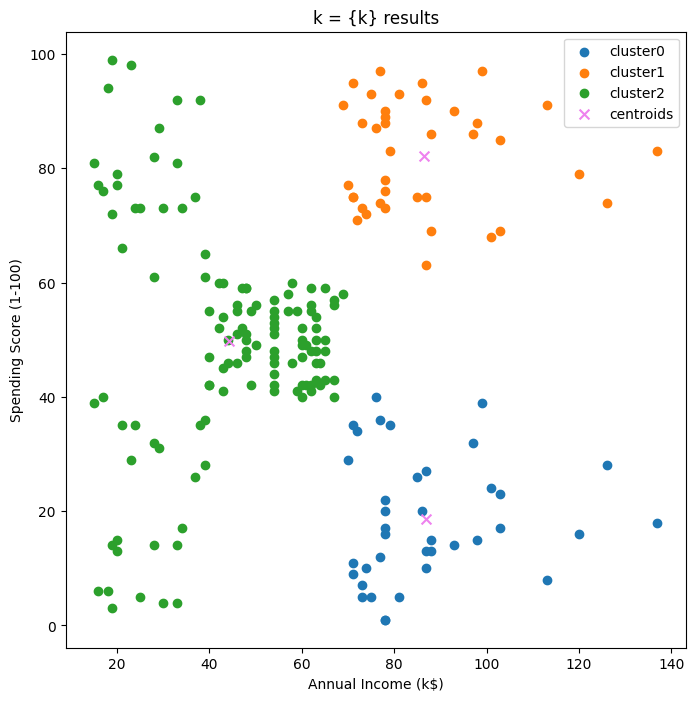

c:\Users\jmw31\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jmw31\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jmw31\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jmw31\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

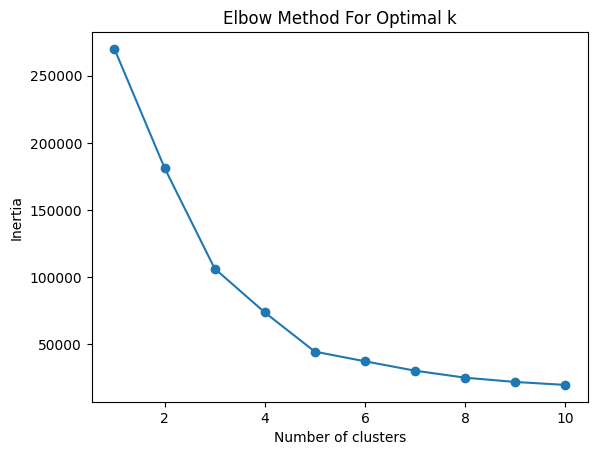

In [24]:
# 실습 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


df = pd.read_csv("Mall_Customers.csv")
print(df.head(5))

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
k = 3   # clustering 개수
km = KMeans(n_clusters=k, random_state=10)

# 클러스터 중심 계산 및 각 샘플에 대한 클러스터 인덱스 예측
df['cluster'] = km.fit_predict(data)  # 클러스터 번호 (0, 1, 2)인지 여부 예측하여 저장

# 클러스터 최종 중심값 도출
final_centroid = km.cluster_centers_
print(final_centroid)

# 클러스터 결과 시각화
plt.figure(figsize=(8, 8))
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'],   # df.loc["row", "column"] : 데이터프레임 인덱싱 (i에 해당하는 행 데이터 가져오기)
                df.loc[df['cluster'] == i, 'Spending Score (1-100)'], 
                label='cluster' + str(i))
plt.scatter(final_centroid[:, 0], final_centroid[:, 1], s=50, c='violet', marker='x', label='centroids')
plt.legend()
plt.title('k = {k} results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Elbow Method 구현
def elbow(data):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(data)
        sse.append(km.inertia_)
    return sse

# Elbow Method를 사용하여 inertia 값 계산 및 그래프 그리기
sse = elbow(data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


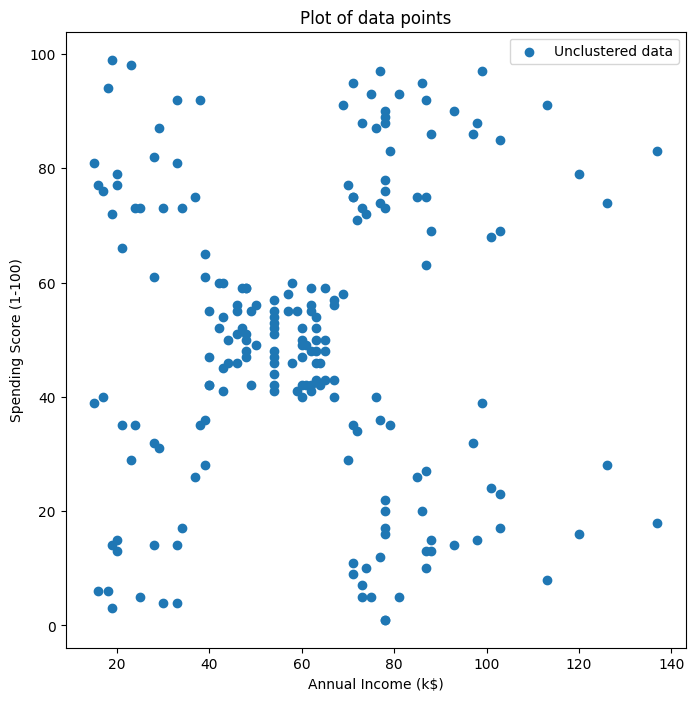

c:\Users\jmw31\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


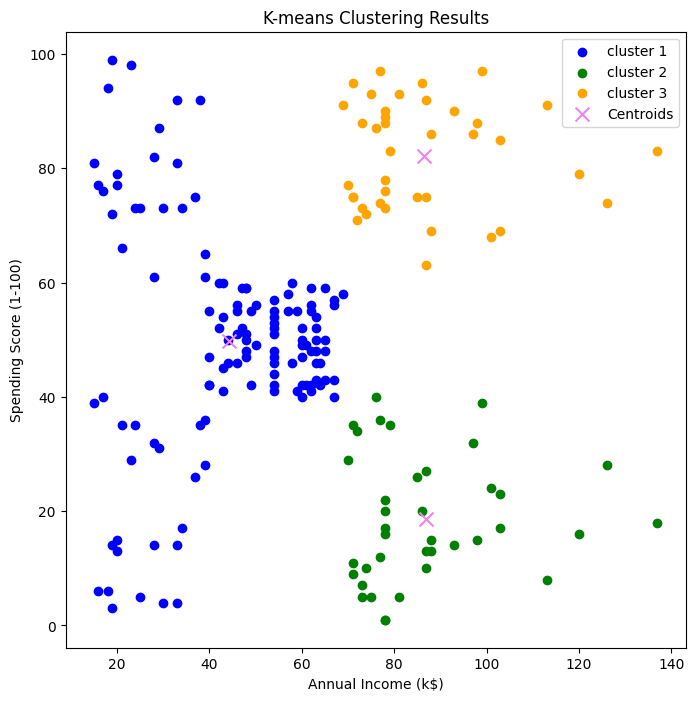

In [2]:
# 실습 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 로드
df = pd.read_csv("Mall_Customers.csv")

# Income과 Spending Score 데이터를 그래프에 표시
plt.figure(figsize=(8, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], label='Unclustered data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Plot of data points')
plt.legend()
plt.show()

# K-means 클러스터링 수행
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
k = 3
km = KMeans(n_clusters=k, init='random', max_iter=100, random_state=42)
df['cluster'] = km.fit_predict(data)

# 클러스터의 중심
final_centroid = km.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 8))
colors = ['blue', 'green', 'orange']
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'],
                df.loc[df['cluster'] == i, 'Spending Score (1-100)'],
                label=f'cluster {i+1}', color=colors[i])
plt.scatter(final_centroid[:, 0], final_centroid[:, 1], s=100, c='violet', marker='x', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()
